## Is there any learning going on?

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dset = xr.load_dataset("data/steinmetz_2016-12-14_Cori.nc")

In [5]:
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

In [11]:
cols = ["response_time", "active_trials", "feedback_type"]
df = dset[cols].to_dataframe().reset_index()
df = df[df.active_trials]
df

,trial,response_time,active_trials,feedback_type
0,1,1.150204,True,1.0
1,2,1.399503,True,1.0
2,3,0.949291,True,1.0
3,4,2.266802,True,1.0
4,5,0.816776,True,-1.0
...,...,...,...,...
209,210,1.453137,True,-1.0
210,211,1.220359,True,-1.0
211,212,2.306214,True,-1.0
212,213,2.277861,True,-1.0


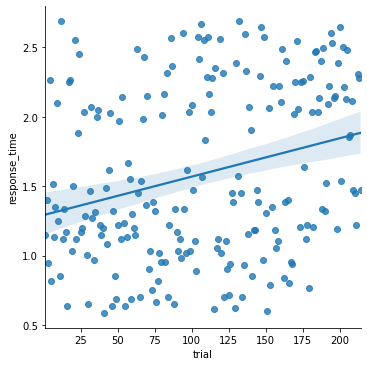

In [12]:
g = sns.lmplot(data=df, x="trial", y="response_time")

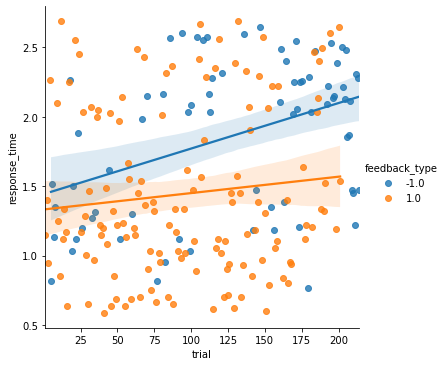

In [13]:
g = sns.lmplot(data=df, x="trial", y="response_time", hue="feedback_type")

## Cori is not learning during the task

# 2. Algnment of neural responses to experimental variables

In [16]:
cols = ["spike_trial", "spike_cell", "spike_time"]
spike_df = dset[cols].to_dataframe().reset_index()
spike_df

,spike_id,spike_trial,spike_cell,spike_time
0,1,21,1,0.267635
1,2,21,1,2.308335
2,3,31,1,0.853476
3,4,37,1,2.197501
4,5,43,1,2.452692
...,...,...,...,...
2446168,2446169,364,734,0.266459
2446169,2446170,364,734,0.587060
2446170,2446171,364,734,0.618560
2446171,2446172,364,734,2.188634


In [79]:
cell_idx = 3
spike_df_cell_x = spike_df[spike_df.spike_cell == cell_idx]

In [80]:
cols = ["active_trials", "response_time", "response_type", "feedback_time", "feedback_type"]
experimental_df = dset[cols].to_dataframe().reset_index()
experimental_df = experimental_df[experimental_df.active_trials]
experimental_df.rename(columns={"trial": "spike_trial"}, inplace=True)
experimental_df

,spike_trial,active_trials,response_time,response_type,feedback_time,feedback_type
0,1,True,1.150204,1.0,1.186819,1.0
1,2,True,1.399503,-1.0,1.437623,1.0
2,3,True,0.949291,1.0,0.986016,1.0
3,4,True,2.266802,0.0,2.296436,1.0
4,5,True,0.816776,1.0,0.827613,-1.0
...,...,...,...,...,...,...
209,210,True,1.453137,1.0,1.460423,-1.0
210,211,True,1.220359,1.0,1.230819,-1.0
211,212,True,2.306214,0.0,2.310837,-1.0
212,213,True,2.277861,0.0,2.281636,-1.0


In [81]:
spike_df_cell_x

,spike_id,spike_trial,spike_cell,spike_time
1034,1035,3,3,1.668586
1035,1036,5,3,1.324382
1036,1037,5,3,1.431682
1037,1038,6,3,1.835020
1038,1039,6,3,1.918054
...,...,...,...,...
2740,2741,364,3,0.697832
2741,2742,364,3,0.752199
2742,2743,364,3,1.209866
2743,2744,364,3,1.347899


In [82]:
spike_exp_df_cell_x = pd.merge(spike_df_cell_x, experimental_df)
spike_exp_df_cell_x.shape

(823, 9)

<AxesSubplot:xlabel='spike_time', ylabel='spike_trial'>

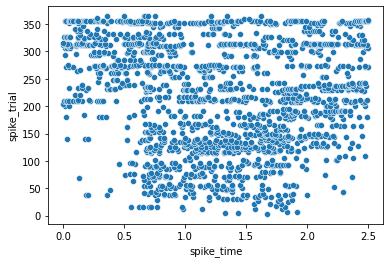

In [83]:
sns.scatterplot(data=spike_df_cell_x, x="spike_time", y="spike_trial")

In [84]:
len(spike_exp_df_cell_x)

823

In [92]:
spike_exp_df_cell_x_sorted = spike_exp_df_cell_x.sort_values(by="response_time")
spike_exp_df_cell_x_sorted["trials_sorted"] = np.arange(len(spike_exp_df_cell_x_sorted))

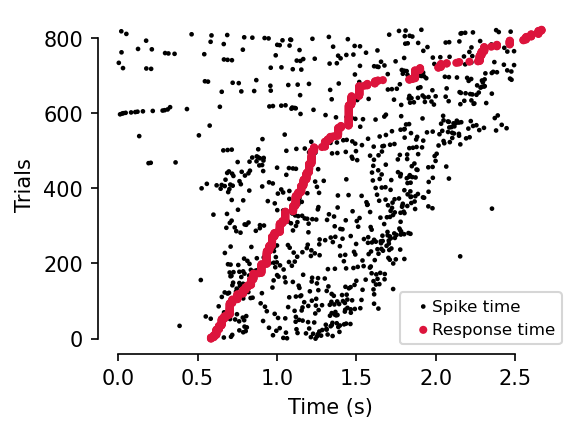

In [132]:
plt.figure(figsize=(4, 3), dpi=150)
sns.scatterplot(data=spike_exp_df_cell_x_sorted, x="spike_time", y="trials_sorted", ec="None", color="k", s=5, label="Spike time")
sns.scatterplot(data=spike_exp_df_cell_x_sorted, x="response_time", y="trials_sorted", ec="None", color="crimson", s=15, label="Response time")
plt.xlabel("Time (s)")
plt.ylabel("Trials")
plt.legend(loc=(.65, 0.03), frameon=True, fontsize=8, handletextpad=-.5)
sns.despine(trim=True)